In [1]:

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'


In [2]:
import anchor

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [3]:
bayesian = anchor.BayesianModalities()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper')

%matplotlib inline

In [5]:
np.random.seed(2016)

n = 1e6

dfs = []

for modality in anchor.MODALITY_ORDER:
    try:
        model = bayesian.models[modality]
        points = model.rvs[-1].rvs(n)
    except KeyError:
        points = np.random.uniform(size=n)
    s = pd.Series(points)
    df = s.to_frame()
    df = df.rename(columns={0:'$\Psi$'})
    df['modality'] = modality
    dfs.append(df)
modality_df = pd.concat(dfs)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
modality_df.head()

,$\Psi$,modality
0,0.087129,excluded
1,0.026280,excluded
2,0.010294,excluded
3,0.035321,excluded
4,0.006677,excluded


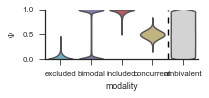

In [7]:
fig, ax = plt.subplots(figsize=(3, 1.5))

sns.violinplot(x='modality', y='$\Psi$', data=modality_df, order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE,
              scale='width', inner=None)
ax.set(ylim=(0, 1), yticks=(0, 0.5, 1))
ax.vlines(3.5, 0, 1, linestyle='--', color='k')
fig.tight_layout()
sns.despine()
fig.savefig('{}/ideal_modalities.pdf'.format(folder))